In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor

In [4]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Calculating missing data
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


In [6]:
## add new features in the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [7]:
#Dealing with the missing data :
#Here we will be replacing the missing country with the most country (mode), cast, and director with no data.
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan,'No data',inplace=True)
df['director'].replace(np.nan,'No data',inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
season_count    0
dtype: int64

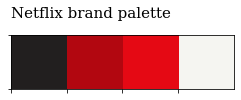

In [9]:
#Netflix’s Brand Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [10]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [12]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#b20710", "#f5f5f1"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [13]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#e50914"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#b20710"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [14]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [14]:
df.isnull().sum()

year         0
month        0
day          0
dep_time     0
dep_delay    0
arr_time     0
arr_delay    0
tailnum      0
flight       0
origin       0
dest         0
air_time     0
distance     0
hour         0
minute       0
dtype: int64

In [15]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#e50914"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [16]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7616,Why We Fight: The Battle of Russia,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
6699,The Negro Soldier,1944
7268,Tunisian Victory,1944
5371,San Pietro,1945
4436,Nazi Concentration Camps,1945


In [17]:
df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7770, dtype: object

In [18]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: first_country, Length: 7770, dtype: object

In [19]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [21]:
df.dtypes

year         int64
month        int64
day          int64
dep_time     int64
dep_delay    int64
arr_time     int64
arr_delay    int64
tailnum      int64
flight       int64
origin       int32
dest         int32
air_time     int64
distance     int64
hour         int64
minute       int64
dtype: object

In [20]:
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

In [21]:
data

first_country
USA         3379
India        956
UK           576
Canada       259
Japan        235
France       196
S. Korea     194
Spain        168
Mexico       123
Turkey       106
Name: count, dtype: int64

Text(0.125, 0.95, 'The three most frequent countries have been highlighted.')

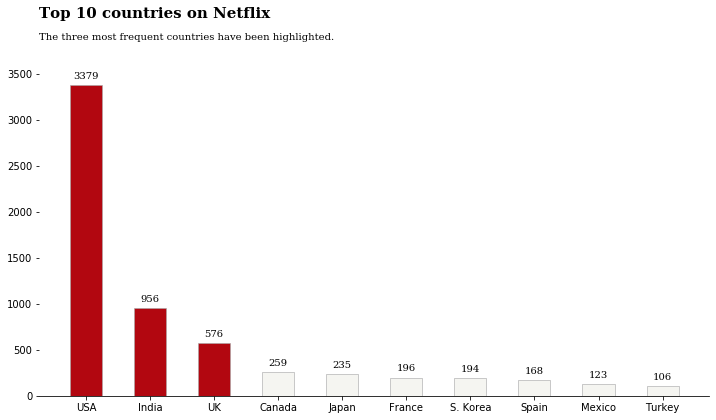

In [22]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))
#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
#Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')

In [23]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#221f1f"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [24]:
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))


trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
data = [trace1]
layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [25]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
#vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
#vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#e50914"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [26]:
import collections
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = collections.Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [31]:
def country_trace(country, flag="tv_shows"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
   
    tags = collections.Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="" ,  marker=dict(color= "#221f1f"))
    return trace
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [33]:
def stand_up(country):
    tag = "Stand-Up Comedy"
    df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
    small = df[df["relevant"] == 1]
    name=small[small["country"] == country][["title", "country","release_year"]].head(10)
    return name

In [34]:
stand_up("United States")

,title,country,release_year
197,A Little Help with Carol Burnett,United States,2018
305,Adam Devine: Best Time of Our Lives,United States,2019
307,ADAM SANDLER 100% FRESH,United States,2018
310,Adel Karam: Live from Beirut,United States,2018
386,Ali Wong: Baby Cobra,United States,2016
387,Ali Wong: Hard Knock Wife,United States,2018
482,Amy Schumer Growing,United States,2019
483,Amy Schumer: The Leather Special,United States,2017
535,Anjelah Johnson: Not Fancy,United States,2015
550,Anthony Jeselnik: Fire in the Maternity Ward,United States,2019


In [35]:
stand_up("India")

,title,country,release_year
312,Aditi Mittal: Things They Wouldn't Let Me Say,India,2017
477,Amit Tandon: Family Tandoncies,India,2019
2350,Gangs of Hassepur,India,2014
3339,Kenny Sebastian: The Most Interesting Person i...,India,2020
3511,Ladies Up,India,2019
4079,Midnight Misadventures With Mallika Dua,India,2018
7427,Vir Das: For India,India,2020
7429,Vir Das: Outside In - The Lockdown Special,India,2020
7744,"Yours Sincerely, Kanan Gill",India,2020


In [36]:
stand_up("United Kingdom")

,title,country,release_year
919,Bill Hicks: One Night Stand,United Kingdom,1991
921,Bill Hicks: Relentless,United Kingdom,1992
922,Bill Hicks: Revelations,United Kingdom,1993
1101,Bridget Christie: Stand Up for Her,United Kingdom,2016
2416,Gina Yashere: Skinny B*tch,United Kingdom,2008
2536,Greg Davies: You Magnificent Beast,United Kingdom,2018
3099,Jack Whitehall: At Large,United Kingdom,2017
3100,Jack Whitehall: Christmas with My Father,United Kingdom,2019
3101,Jack Whitehall: I'm Only Joking,United Kingdom,2020
3118,James Acaster: Repertoire,United Kingdom,2018


In [37]:
stand_up("Bangladesh")

,title,country,release_year


In [38]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)

    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


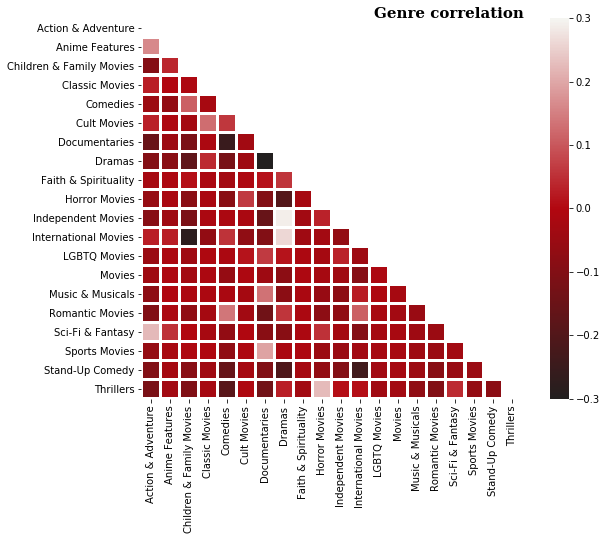

In [39]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

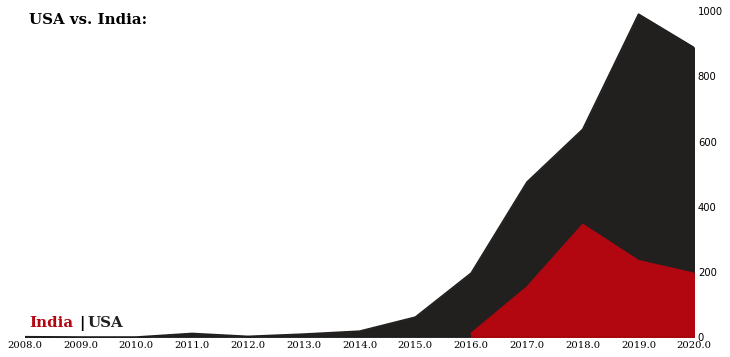

In [41]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#221f1f', '#b20710','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    #ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    

ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'USA vs. India:', fontsize=15, fontweight='bold', fontfamily='serif')



fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,first_country,count,from_us,relevant
0,s1,TV Show,3%,No data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,Brazil,1,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,Mexico,1,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,Singapore,1,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,USA,1,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,USA,1,0,0


In [44]:
df.shape

(7770, 19)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7770 non-null   object        
 1   type           7770 non-null   object        
 2   title          7770 non-null   object        
 3   director       7770 non-null   object        
 4   cast           7770 non-null   object        
 5   country        7770 non-null   object        
 6   date_added     7770 non-null   datetime64[ns]
 7   release_year   7770 non-null   int64         
 8   rating         7770 non-null   object        
 9   duration       7770 non-null   object        
 10  listed_in      7770 non-null   object        
 11  description    7770 non-null   object        
 12  year_added     7770 non-null   float64       
 13  month_added    7770 non-null   float64       
 14  season_count   7770 non-null   object        
 15  first_country  7770 n

In [46]:
df.describe()

,release_year,year_added,month_added,count,from_us,relevant
count,7770.000000,7770.000000,7770.000000,7770.0,7770.000000,7770.000000
mean,2013.935393,2018.494981,6.784942,1.0,0.036680,0.049035
std,8.764357,1.387582,3.591219,0.0,0.187986,0.215954
min,1925.000000,2008.000000,1.000000,1.0,0.000000,0.000000
25%,2013.000000,2018.000000,4.000000,1.0,0.000000,0.000000
50%,2017.000000,2019.000000,7.000000,1.0,0.000000,0.000000
75%,2018.000000,2020.000000,10.000000,1.0,0.000000,0.000000
max,2021.000000,2021.000000,12.000000,1.0,1.000000,1.000000


In [47]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5.0,0.226777,0.434518,-0.010113,-0.002624,0.045878,0.100745,1.0
year_added,5.0,0.173398,0.471028,-0.133257,-0.099479,-0.001021,0.100745,1.0
month_added,5.0,0.172519,0.466118,-0.133257,-0.010113,0.002479,0.003488,1.0
count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_us,5.0,0.191741,0.452186,-0.041139,-0.002624,-0.001021,0.003488,1.0
relevant,5.0,0.181548,0.460679,-0.099479,-0.041139,0.002479,0.045878,1.0


In [48]:
df.max()

show_id                                                       s999
type                                                       TV Show
title                                          최강전사 미니특공대 : 영웅의 탄생
director                                              Şenol Sönmez
cast             Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...
country                                                   Zimbabwe
date_added                                     2021-01-16 00:00:00
release_year                                                  2021
rating                                                          UR
duration                                                        99
listed_in                                                Thrillers
description      Zoe Walker leaves her quiet life behind to inv...
year_added                                                  2021.0
month_added                                                   12.0
season_count                                                  

In [49]:
df.min()

show_id                                                         s1
type                                                         Movie
title                                                       #Alive
director                                               A. L. Vijay
cast             'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od...
country                                                  Argentina
date_added                                     2008-01-01 00:00:00
release_year                                                  1925
rating                                                           G
duration                                                          
listed_in                                       Action & Adventure
description      "Brooklyn Nine-Nine" star Chelsea Peretti show...
year_added                                                  2008.0
month_added                                                    1.0
season_count                                                  

In [50]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



release_year    2013.935393
duration                inf
year_added      2018.494981
month_added        6.784942
season_count            inf
count              1.000000
from_us            0.036680
relevant           0.049035
dtype: float64

In [52]:
df.dtypes

show_id                  object
type                     object
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
year_added              float64
month_added             float64
season_count             object
first_country            object
count                     int64
from_us                   int64
relevant                  int64
dtype: object

In [53]:
import sweetviz as sv

In [54]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [55]:
from IPython.display import IFrame

In [56]:
IFrame(src='Analyze.html',width=1000,height=600)

In [57]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count,first_country,count,from_us,relevant
0,s1,TV Show,3%,No data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4,Brazil,1,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,,Mexico,1,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,,Singapore,1,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,,USA,1,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,,USA,1,0,0
